In [1]:
%run ../scripts/python/standardize.py
%matplotlib inline
pd.set_option('max_columns',50)

Could really use a data user guide for the categories that exist in these contracts datasets!

Create a master function downloading building permit data

In [6]:
permit_dfs = make_dfs('../_data/blds.csv')

['Almeda', 'http://www.civicdata.com/api/3/action/datastore_search?resource_id=f148b5d2-b278-40ba-8ca4-945031d5994c', '', 48]
['Bernalillo', 'http://www.civicdata.com/api/3/action/datastore_search?resource_id=5a8094a3-9a68-46cd-95d0-c3b5b9d427ae', '', 47]
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=10000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=20000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=30000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=40000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=50000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=60000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=70000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=80000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=90000
https://data.ci

Chattanooga has the fewest columns

In [3]:
permittypemapped_list = ['Building',
                        'Demolition',
                        'Electrical',
                        'Mechanical',
                        'Plumbing',
                        'Roof',
                        'Fence',
                        'Grading',
                        'Pool',
                        'Spa']

In [7]:
headers_dict, headers_dfs = get_same_cols(permit_dfs)

In [61]:
len(permit_dfs)

9

In [37]:
from jellyfish import jaro_winkler

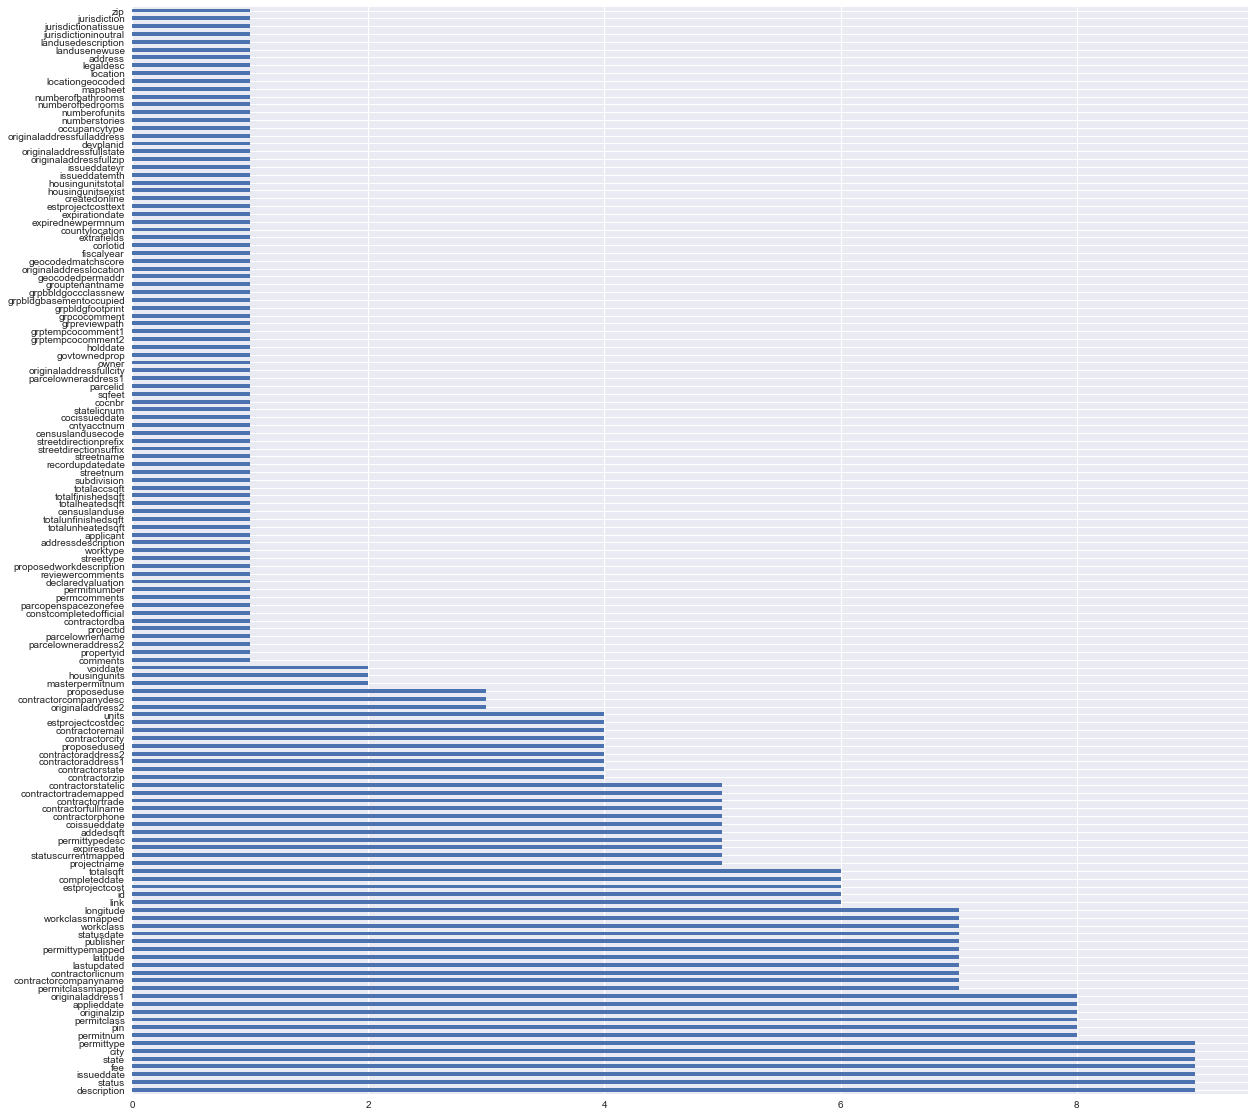

In [6]:
headers_dfs['count'].plot(kind='barh', figsize=(20,20))


Raleigh has coded address with each element separetly, but also has it in the more common format that other cities use.  In fact it seems like Raleigh has fields speifically for GeoJson

In [7]:
def no_chat(permit_dfs,series):
    for place in permit_dfs.keys():
        if place not in series:
            return True
        else:
            return False

headers_g6 = headers_dfs[headers_dfs['count']>= 6]
headers_g6 = headers_g6.reset_index()
headers_g6['field'] = headers_g6['index'] 

no_chat_series = headers_g6[headers_g6['count']>= 6].datasets.apply(lambda x: no_chat(permit_dfs,x))

I'm kind of not even sure how this works

In [8]:
headers_g6[no_chat_series].field

28    totalsqft
Name: field, dtype: object

original
address location has lat long in it.

In [9]:
headers_dfs.head(1)

count                                           datasets missing
description     9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...      []

In [10]:
check_na(permit_dfs['Chattanooga'])

value                    False  True 
variable                             
applieddate              18203      0
city                     18123     80
contractorcompanyname    17013   1190
contractorlicnum         17022   1181
contractorphone          14913   3290
description              18140     63
estprojectcost           18203      0
fee                      18058    145
issueddate               17352    851
lastupdated              15884   2319
originaladdress1         18123     80
originaladdresslocation  15834   2369
originalzip              18111     92
permitclass              18203      0
permitnum                18203      0
permittype               18142     61
pin                      15918   2285
state                    16075   2128
status                   18153     50
statusdate               18168     35
units                    18185     18

There are many entries without lat long.  We are not focusing on lat long for this project, but for the sake of knowing that that most BLDS datasets will have lat long (hiding or not hiding) this was useful

In [8]:
headers_dfs[headers_dfs['count'] >= 8]

count                                           datasets  \
description          9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
status               9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
issueddate           9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
fee                  9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
state                9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
city                 9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
permittype           9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
permitnum            8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
pin                  8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
permitclass          8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
originalzip          8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
applieddate          8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
originaladdress1     8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   

                   missing  
description             []  
status                  []  
issueddate              []  
fee                     []  
state                   []  
city                    []  
permittype              []  
permitnum         [Boston]  
pin               [Boston]  
permitclass       [Boston]  
originalzip       [Boston]  
applieddate       [Boston]  
originaladdress1  [Boston]

In [376]:
permit_dfs['Chattanooga'].head(1)

applieddate contractorcompanyname contractorlicnum contractorphone  \
0  2009-02-10T00:00:00                 OWNER          0000000             NaN   

                                         description  estprojectcost    fee  \
0  MAJOR REPAIRS TO EXISTING SINGLE FAMILY RESIDENCE         22500.0  150.0   

            issueddate  lastupdated originaladdress1 originaladdresslocation  \
0  2009-02-10T00:00:00   20090826.0    3501 04TH AVE                     NaN   

  originalcity originalstate  originalzip      permitclass permitnum  \
0  CHATTANOOGA            TN      37407.0  Building Permit  09-10159   

                                          permittype              pin  \
0  Building/Building Permit/Residential (1-2 Unit...  033168A H 00200   

  statuscurrent           statusdate  units  
0        Closed  2009-08-26T00:00:00      1

In [26]:
    
permit_dfs['Chattanooga']['permittypemapped'] = permit_dfs['Chattanooga'].permittype.apply(lambda x: get_permittypemapped(x,permittypemapped_list))

In [607]:
permit_dfs['Boston'].head(1)

address       applicant    city  \
0  160    Beacon ST  LANCE HOLMGREN  Boston   

                                        comments  declaredvaluation  \
0  Installed heat pumps/central air conditioning             8000.0   

  description       expirationdate           issueddate  \
0  Electrical  2010-07-04T00:00:00  2010-01-04T08:13:46   

                                            location occupancytype  \
0  {'latitude': '42.35473', 'human_address': '{"a...         Multi   

                         owner     parcelid permitnumber         permittype  \
0  ONE HUNDRED SIXTY BEACON ST  502592000.0        E2994  Electrical Permit   

   propertyid  sqfeet state   status   fee    worktype     zip  latitude  \
0      9703.0     0.0    MA  EXPIRED  21.0  ELECTRICAL  2116.0  42.35473   

   longitude permittypemapped  
0  -71.07607       ELECTRICAL

In [14]:
permit_dfs['Boston']['permittypemapped'] = permit_dfs['Boston'].permittype.apply(lambda x: get_permittypemapped(x,permittypemapped_list))

In [29]:
permit_dfs['Boston']['permittypemapped'].value_counts()

ELECTRICAL    118430
PLUMBING       44408
Name: permittypemapped, dtype: int64

In [30]:
permit_dfs['Almeda'].head(1)

addedsqft applieddate completeddate  contractoraddress1 contractoraddress2  \
0            2014-04-07    2014-04-10  27 LAVAGETTO COURT                      

  contractorcity contractorcompanydesc      contractorcompanyname  \
0        ALAMEDA                        SING SING CONSTRUCTION CO   

            contractoremail contractorfullname contractorlicnum  \
0  KARENANDCHEE@HOTMAIL.COM         CHEE CHAN            519536   

  contractorphone contractorstate contractorstatelic contractortrade  \
0      5104066151              CA                 CA      CONTRACTOR   

  contractortrademapped contractorzip createdonline  \
0                               94502             N   

                                         description estprojectcost  \
0  REMOVE &amp; REPLACE WATER HEATER  (40 GALLONS...            500   

  estprojectcostdec expiresdate extrafields     fee  issueddate  \
0               500  2017-04-06              123.73  2014-04-07   

               lastupdated latitude  \
0  2014-04-10T16:23:26.000            

                                                link longitude  \
0  https://aca.accela.com/alameda/Cap/CapDetail.a...             

  originaladdress1 originaladdress2     city state originalzip  \
0  532 HAIGHT AVE                    ALAMEDA    CA       94501   

               pin permitclass permitclassmapped permitnum  \
0  074-0441-001-00                                P14-0175   

                    permittype permittypemapped proposedused        publisher  \
0  Plumbing - Over the Counter         Plumbing               CITY OF ALAMEDA   

    status statuscurrentmapped  statusdate workclass workclassmapped    id  
0  FINALED      Permit Finaled  2014-04-10       434        Existing  4942

In [31]:
permit_dfs['Raleigh'].head(1)

applieddate                            censuslanduse  \
0  2007-01-02T00:00:00.000  ADDITION/ALTERATION NONRESIDENTIAL BLDG   

   censuslandusecode cntyacctnum cocissueddate  cocnbr  \
0              437.0      243025           NaN     NaN   

              coissueddate constcompletedofficial          contractoraddress1  \
0  2007-02-23T00:00:00.000                    Yes  2315 MYRON DRIVE SUITE 200   

  contractoraddress2 contractorcity    contractorcompanyname contractordba  \
0                NaN        RALEIGH  VISION CONTRACTORS INC.           NaN   

     contractoremail  contractorlicnum  contractorphone contractorstate  \
0  taylor@vci-nc.com            7227.0     9.197877e+09              NC   

  contractorzip corlotid countylocation                        description  \
0         27607     0001           WAKE  INT ALTERATION APT SUNDAY DR 1511   

   devplanid  estprojectcost  expirednewpermnum expiresdate       ...        \
0     8379.0         51672.0                NaN         NaN       ...         

         permcomments                              permitclass  \
0  EXPANSION OF SUITE  ADDITION/ALTERATION NONRESIDENTIAL BLDG   

   permitclassmapped permitnum  permittype permittypemapped  pin  \
0    Non-Residential     62567    BUILDING         Building  NaN   

                         projectname                              proposeduse  \
0  ARENA CENTER OFFICE BUILDING SUBD  ADDITION/ALTERATION NONRESIDENTIAL BLDG   

  proposedworkdescription        publisher         recordupdatedate  \
0              ALTERATION  City of Raleigh  2007-01-30T00:00:00.000   

  reviewercomments  statelicnum                            status  \
0              NaN        54353  INACTIVE (INSPECTIONS COMPLETED)   

  statuscurrentmapped  streetdirectionprefix  streetdirectionsuffix  \
0           Occupancy                    NaN                    NaN   

  streetname streetnum streettype totalsqft  voiddate            workclass  \
0     SUNDAY      1511         DR    1342.0       NaN  Alterations/repairs   

  workclassmapped  
0        Existing  

[1 rows x 91 columns]

In [32]:
permit_dfs['Tampa'].head(1)

addedsqft applieddate coissueddate completeddate       contractoraddress1  \
0            2017-07-13                             1800 W ASHTON BOULEVARD   

  contractoraddress2 contractorcity contractorcompanydesc  \
0                500           LEHI                         

        contractorcompanyname contractoremail contractorfullname  \
0  VIVINT SOLAR DEVELOPER LLC              na         Cody Oram    

  contractorlicnum contractorphone contractorstate contractorstatelic  \
0           973756    855 877-2974              UT                 CA   

   contractortrade contractortrademapped contractorzip  \
0  CSLB Contractor                               84043   

                                         description estprojectcost  \
0  CROSS STREET: 14th ST \r\n\r\nDescription of W...                  

  expiresdate fee housingunits  issueddate            latitude  \
0               0            0  2017-07-13  33.036565512346193   

             longitude lastupdated  \
0  -116.87326652268587  2017-07-14   

                                                link masterpermitnum  \
0  https://publicservices.sdcounty.ca.gov/citizen...                   

    originaladdress1    city state originalzip pin  \
0  1395 LA HAINA ST   RAMONA    CA       92065       

                   permitclass permitclassmapped              permitnum  \
0  Residential Alteration-Addn       Residential  PDS2017-RESALT-005662   

                                          permittype  \
0  Residential Alteration or Addition - Plan Chec...   

                                      permittypedesc permittypemapped  \
0  8002 - REN - Solar Photovoltaic Roof Mount Res...                    

                                        proposedused  \
0  CROSS STREET: 14th ST \n\nDescription of Work:...   

                    publisher  status statuscurrentmapped  statusdate  \
0  San Diego - Prod 7.3.3.8.1  Issued       Permit Issued  2017-07-13   

  totalsqft workclass workclassmapped     id  
0            Existing        Existing  81266

In [33]:
permit_dfs['Tampa'][['permittype','permittypemapped']].permittype.iloc[1]

'Residential Alteration or Addition - Plan Check-Permit'

It appears that permittype and permittypedescr/permittypedesc are often confused and could be the same or different depending on the dataset

In [9]:
permit_dfs['Boston']['permittypemapped'] = permit_dfs['Boston']['worktype']

In [10]:
pd.set_option('max_columns',50)
permit_dfs['Chattanooga']['latitude'] = permit_dfs['Chattanooga']['originaladdresslocation'].apply(lambda x: lat_long_from_loc(x,'latitude'))
permit_dfs['Chattanooga']['longitude'] = permit_dfs['Chattanooga']['originaladdresslocation'].apply(lambda x: lat_long_from_loc(x,'longitude'))

In [36]:
permit_dfs['Bernalillo'].head(2)

applieddate completeddate         contractoraddress1  contractoraddress2  \
0  2015-02-25                2817 MORNINGSIDE DRIVE NE                       
1  2015-02-24                       1410 GRIEGOS RD NW  1410 GRIEGOS RD NW   

  contractorcity contractorcompanydesc contractorcompanyname  \
0    ALBUQUERQUE                           JOHNNY'S ELECTRIC   
1    ALBUQUERQUE                                   RVV ELECT   

           contractoremail   contractorfullname contractorlicnum  \
0  johnnyselectric@msn.com      JOHN D WIEGERS            366433   
1                 no email  RICHARD VILLANUEVA             26158   

  contractorphone contractorstate contractorstatelic contractortrade  \
0        248-0338              NM                 NM      Contractor   
1        344-1377              NM                 NM      Contractor   

  contractortrademapped contractorzip  \
0                          87110-2941   
1                               87107   

                                         description estprojectcost  \
0  7419 S/F NEW SFD TOTAL \r\nFOOTPRINT 4599 S/F....              0   
1                                  Alteration/Repair              0   

  expiresdate     fee housingunits  issueddate              lastupdated  \
0  2015-09-23  251.25               2015-02-25  2015-03-27T08:32:15.000   
1  2015-08-31    63.5               2015-02-24  2015-03-03T13:20:37.000   

                                 legaldesc  \
0  LT. 6 NATURE POINTE COMMUNITY/ 2.0035AC   
1                    TRACT 196 D2B MAP 44    

                                                link      originaladdress1  \
0  http://epermits.bernco.gov/CitizenAccess/Cap/C...  10 NATURE POINTE Dr    
1  http://epermits.bernco.gov/CitizenAccess/Cap/C...      1419 LA VEGA Dr    

          city state originalzip     pin permitclass permitclassmapped  \
0      TIJERAS    NM       87059  259687  Electrical       Residential   
1  ALBUQUERQUE    NM               58356  Electrical       Residential   

       permitnum              permittype          permittypedesc  \
0  ELRE2015-0176  Electrical Residential  Electrical Residential   
1  ELRE2015-0164  Electrical Residential  Electrical Residential   

  permittypemapped        projectname       proposedused publisher  status  \
0       Electrical                SFD                SFD    BERNCO  Issued   
1       Electrical  Alteration/Repair  Alteration/Repair    BERNCO  Issued   

  statuscurrentmapped  statusdate    subdivision totalsqft workclass  \
0       Permit Issued  2015-02-25  NATURE POINTE                       
1       Permit Issued  2015-02-24                                      

  workclassmapped   id  
0                  803  
1                  814

run again to include changes to jurisdiction dataframes

In [11]:
headers_dict, headers_dfs = get_same_cols(permit_dfs)

In [12]:
headers_dfs[headers_dfs['count'] >=8]

count                                           datasets  \
fee                  9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
city                 9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
permittype           9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
status               9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
state                9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
description          9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
issueddate           9  [Almeda, Bernalillo, Boston, Chattanooga, Desc...   
latitude             8  [Almeda, Boston, Chattanooga, Deschutes, Ralei...   
pin                  8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
originaladdress1     8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
originalzip          8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
permitclass          8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
permitnum            8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   
permittypemapped     8  [Almeda, Bernalillo, Boston, Deschutes, Raleig...   
longitude            8  [Almeda, Boston, Chattanooga, Deschutes, Ralei...   
applieddate          8  [Almeda, Bernalillo, Chattanooga, Deschutes, R...   

                        missing  
fee                          []  
city                         []  
permittype                   []  
status                       []  
state                        []  
description                  []  
issueddate                   []  
latitude           [Bernalillo]  
pin                    [Boston]  
originaladdress1       [Boston]  
originalzip            [Boston]  
permitclass            [Boston]  
permitnum              [Boston]  
permittypemapped  [Chattanooga]  
longitude          [Bernalillo]  
applieddate            [Boston]

In [45]:
agg_df = pd.DataFrame(columns=['permittypemapped','description','issueddate','fee','statuscurrent', 'city','state','latitude','longitude'])
for key,df in permit_dfs.items():
    if key == 'Bernalillo':
        agg_df = pd.concat([agg_df,df[['permittypemapped','description','issueddate','fee','status', 'city','state']]])
    else:
        agg_df = pd.concat([agg_df,df[['permittypemapped','description','issueddate','fee','status', 'city','state', 'latitude','longitude']]])

In [38]:
agg_df.state.value_counts()

MA    329507
NC    132028
TN     16053
OR       200
CA       190
FL       100
NM        99
AK        21
          11
SD         1
Name: state, dtype: int64

In [49]:
check_na(agg_df)

value              False   True 
variable                        
city              462913   17425
description       474900    5438
fee               480193     145
issueddate        476413    3925
latitude          442445   37893
longitude         442445   37893
permittypemapped  460283   20055
state             478210    2128
status            480288      50
statuscurrent          0  480338

In [54]:
agg_df['issuedmonth']= agg_df.issueddate.apply(lambda x: pd.to_datetime(x).month)

In [55]:
agg_df['issuedyear']= agg_df.issueddate.apply(lambda x: pd.to_datetime(x).year)

In [56]:
agg_df['issuedday']= agg_df.issueddate.apply(lambda x: pd.to_datetime(x).day)

In [619]:
agg_df[agg_df.issuedyear >= 2010].state.value_counts()

MA    329507
NC     52117
TN     13525
CA       181
OR       176
NM        97
FL        91
AK        21
           7
Name: state, dtype: int64

In [512]:
year_by_state = agg_df.groupby(['state','issuedyear']).size().to_frame().reset_index().rename(columns={0:'yearcount'})

In [57]:
agg_df_2010 = agg_df[agg_df.issuedyear >= 2010]

In [516]:
year_by_state['state_and_year'] = year_by_state.apply(lambda x:combine(x),axis=1)

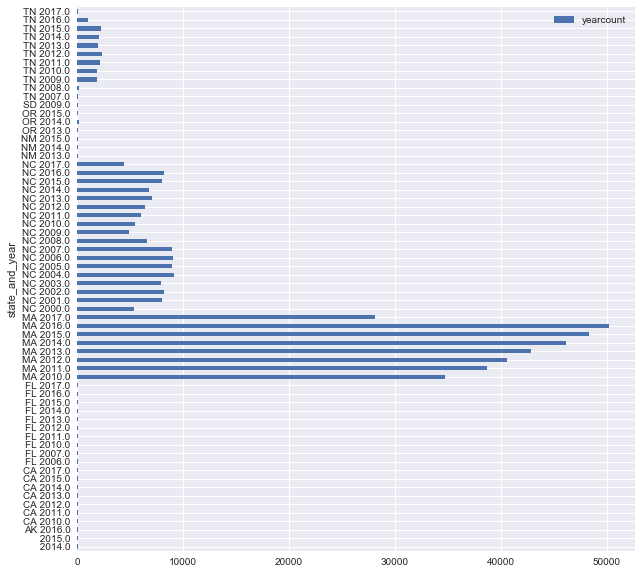

In [517]:
year_by_state.plot(kind='barh', x = 'state_and_year',y='yearcount', figsize=(10,10))

In [641]:
agg_df_2010.to_pickle('standardized_blds.p')

In [621]:
permitmapped_by_state = agg_df_2010.groupby(['state','permittypemapped']).size().to_frame().reset_index().rename(columns={0:'permit_count'})

In [622]:
permitmapped_by_state.head(1)

state permittypemapped  permit_count
0               Building             3

Lets get a better understanding of the distrubtion of field values!

In [577]:
state_list = ['Almeda',
 'Bernalillo',
 'Boston',
 'Chattanooga',
 'Deschutes',
 'Raleigh',
 'San Diego',
 'Seattle',
 'Tampa']

Here is where we can employ some edit distance function to find similar permit types to find similar permit types.  This is not without a careful look at the given fields

In [59]:
agg_df_2010['permittypemapped'] = agg_df_2010.permittypemapped.apply(lambda x: not_null_then_upper(x))

/Users/summerfellow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
agg_df_2010['state']=agg_df_2010.state.fillna('TN')

/Users/summerfellow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
agg_df_2010.to_csv('_data/standardized_blds.csv')

In [650]:
check_na(agg_df_2010)

value              False   True 
variable                        
city              389591    8030
description       393434    4187
fee               397610      11
issueddate        397621       0
issuedmonth       397621       0
issuedyear        397621       0
permittypemapped  217192  180429
state             397621       0
status            397621       0
statuscurrent          0  397621

In [653]:
for city, df in permit_dfs.items():
    print(city,check_na(df))

Almeda value                  False
variable                    
addedsqft                100
applieddate              100
city                     100
completeddate            100
contractoraddress1       100
contractoraddress2       100
contractorcity           100
contractorcompanydesc    100
contractorcompanyname    100
contractoremail          100
contractorfullname       100
contractorlicnum         100
contractorphone          100
contractorstate          100
contractorstatelic       100
contractortrade          100
contractortrademapped    100
contractorzip            100
createdonline            100
description              100
estprojectcost           100
estprojectcostdec        100
expiresdate              100
extrafields              100
fee                      100
id                       100
issueddate               100
lastupdated              100
latitude                 100
link                     100
longitude                100
originaladdress1         100
origina

San Diego value                False  True 
variable                         
addedsqft              100      0
addressdescription     100      0
applieddate            100      0
city                   100      0
coissueddate           100      0
completeddate          100      0
description            100      0
estprojectcost         100      0
estprojectcostdec      100      0
estprojectcosttext     100      0
expiresdate            100      0
fee                    100      0
holddate               100      0
id                     100      0
issueddate             100      0
lastupdated            100      0
latitude                64     36
link                   100      0
longitude               64     36
masterpermitnum        100      0
numberofbathrooms      100      0
numberofbedrooms       100      0
numberofunits          100      0
originaladdress1       100      0
originaladdress2       100      0
originalzip            100      0
permitclass            100      0
perm

In [ ]:
for city, df in permit_dfs.items():
    print(city)
    df['permittypemapped'] = df['permittypemapped'].apply(lambda x: not_null_then_upper(x))
    

In [677]:
check_na(agg_df_2010)

value              False   True 
variable                        
city              389591    8030
description       393434    4187
fee               397610      11
issueddate        397621       0
issuedmonth       397621       0
issuedyear        397621       0
permittypemapped  217192  180429
state             397621       0
status            397621       0
statuscurrent          0  397621

In [690]:
agg_df_2010['city'] = agg_df_2010.city.apply(lambda x: not_null_then_upper(x))

/Users/summerfellow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [692]:
agg_df_2010.city.value_counts()


BOSTON                          113185
DORCHESTER                       46125
RALEIGH                          44041
ROXBURY                          25663
JAMAICA PLAIN                    19538
SOUTH BOSTON                     17056
ROSLINDALE                       15614
WEST ROXBURY                     15566
CHATTANOOGA                      14049
EAST BOSTON                      13963
BRIGHTON                         13830
HYDE PARK                        12200
CHARLESTOWN                      10708
MATTAPAN                          9496
ALLSTON                           6605
MISSION HILL                      4773
HIXSON                            1196
CHESTNUT HILL                      600
SOUTH END                          332
SOUTH BOSTON/                      291
DOWNTOWN/FINANCIAL DISTRICT        267
BOSTON/WATERFRONT                  234
EAST BOSTON/                       224
FENWAY                             222
FINANCIAL DISTRICT                 220
BOSTON/                  

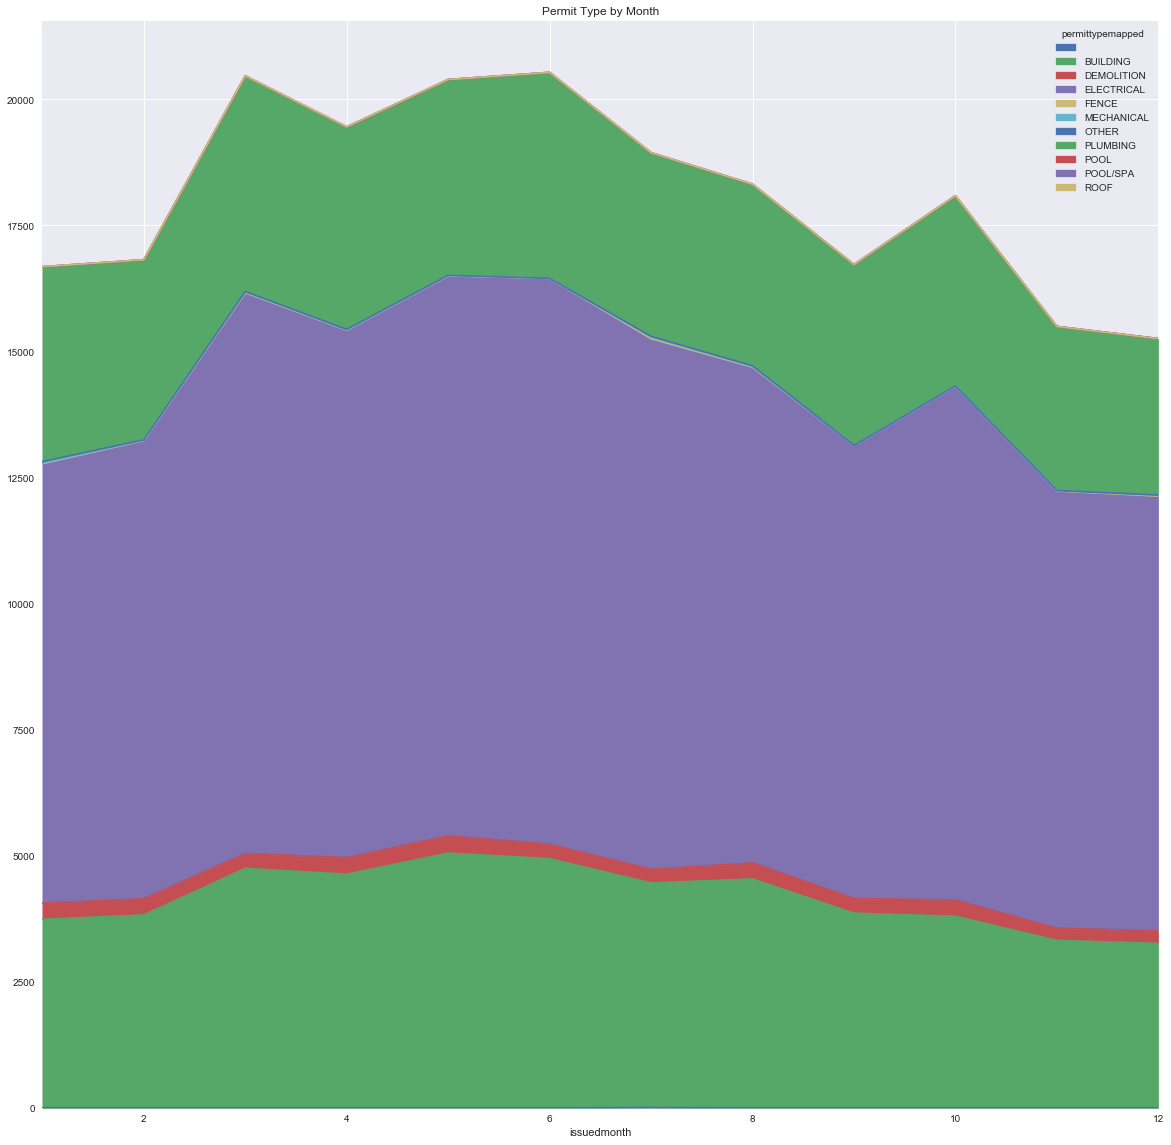

In [744]:
pd.crosstab(agg_df_2010.issuedmonth,agg_df_2010.permittypemapped).plot.area(stacked=True, figsize=(20,20),title='Permit Type by Month')

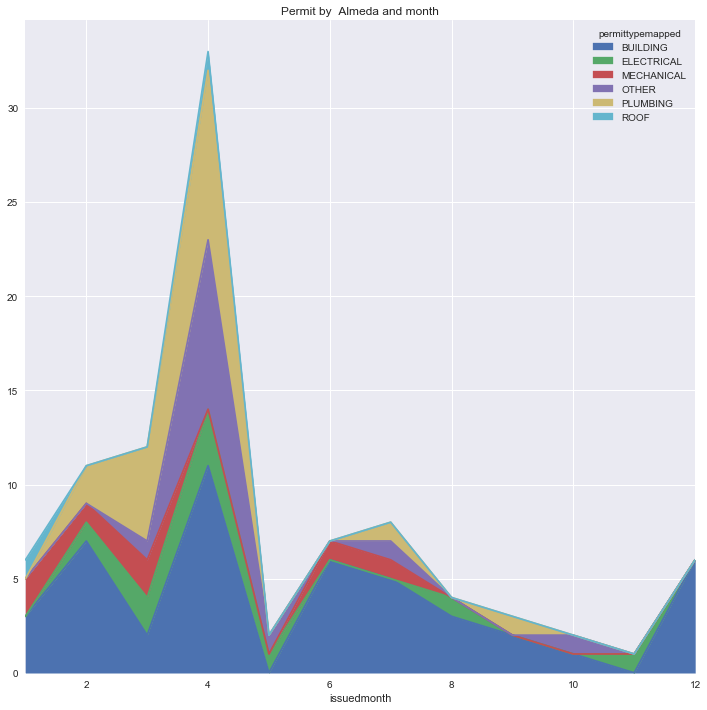

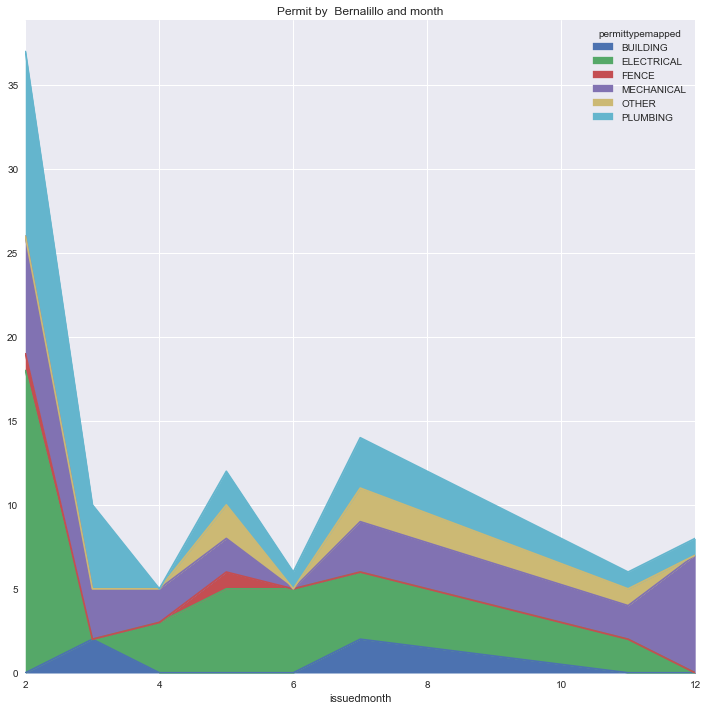

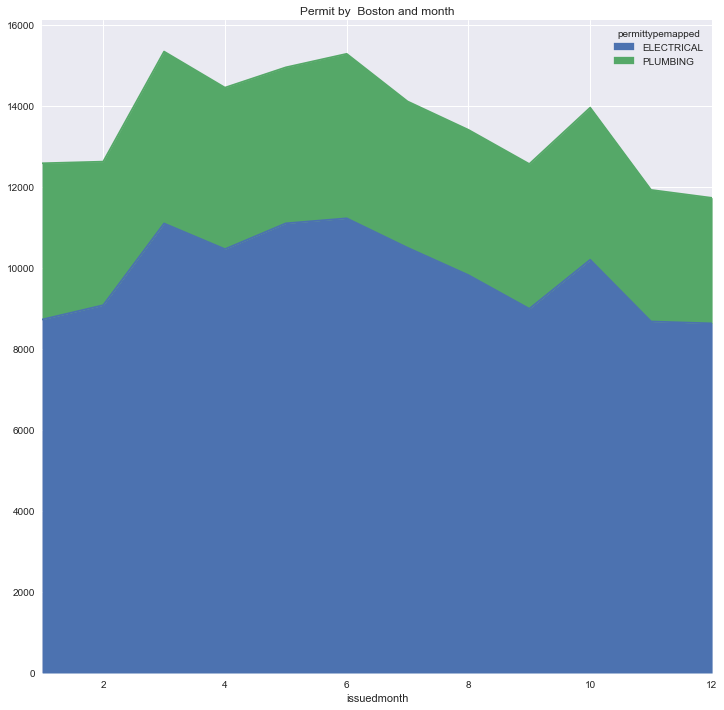

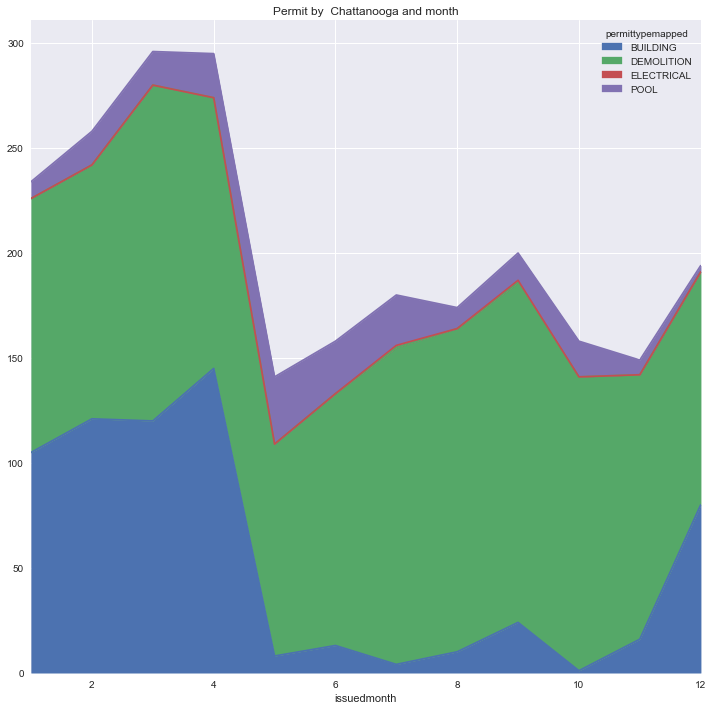

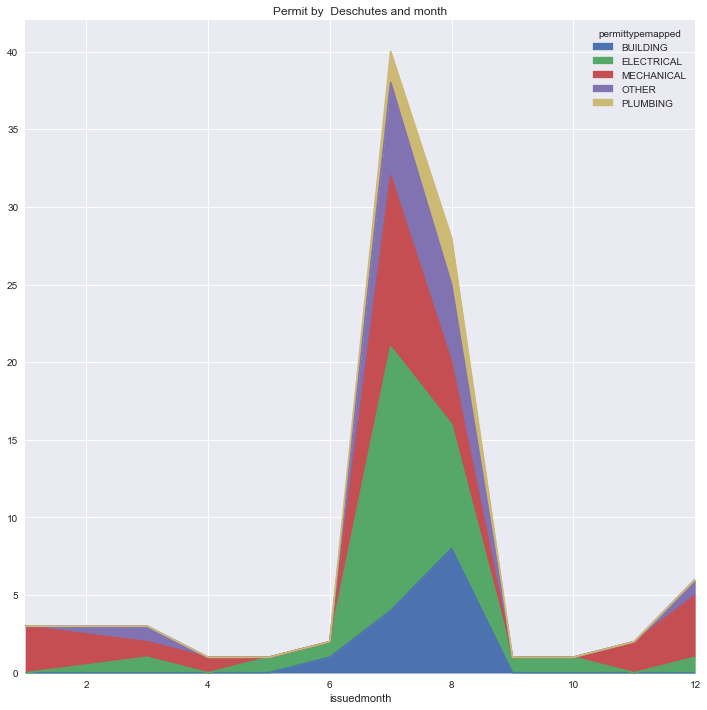

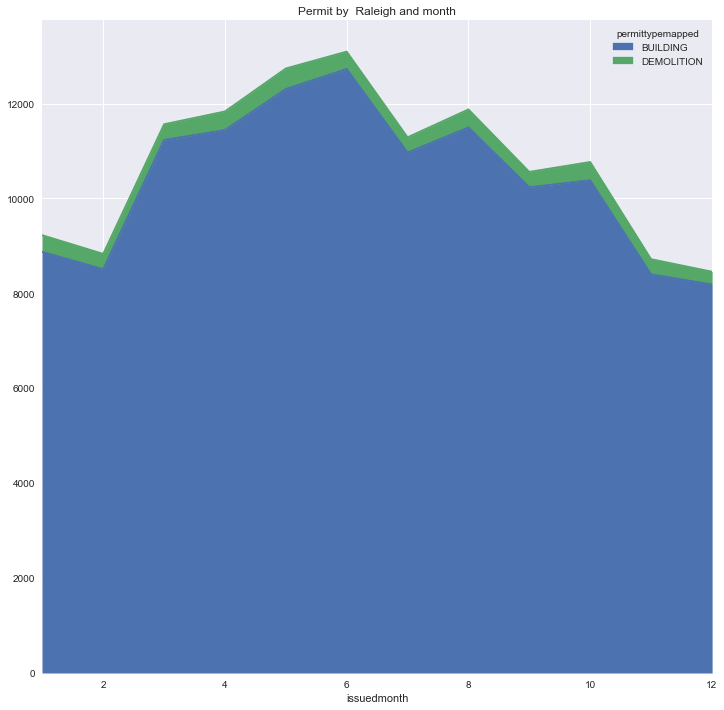

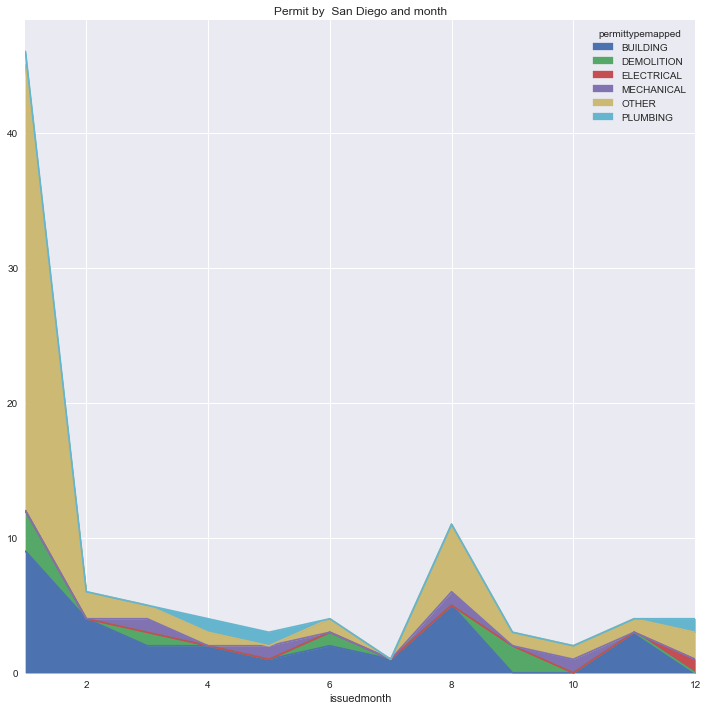

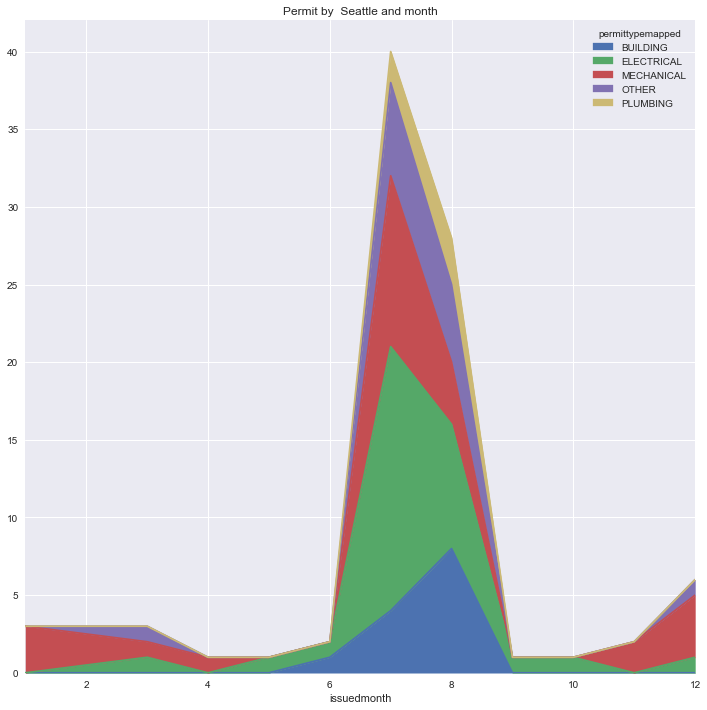

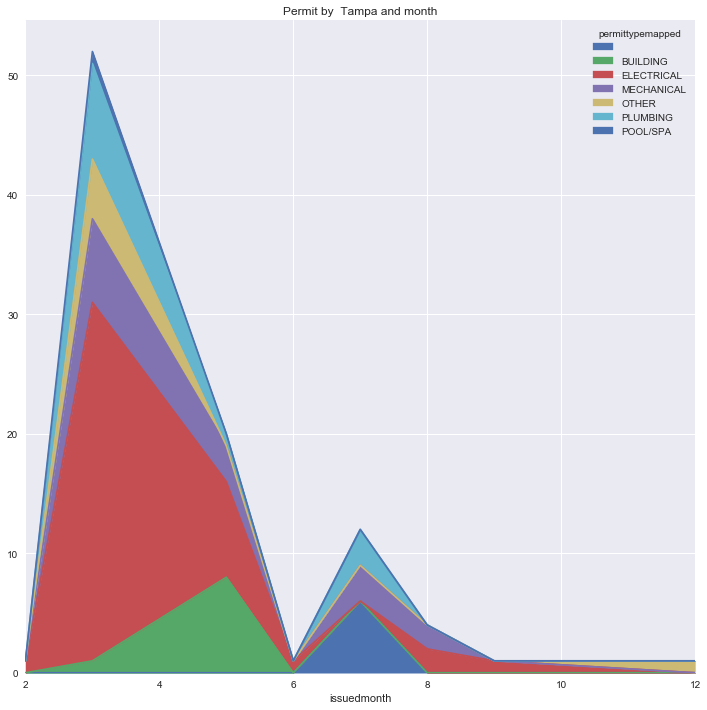

In [753]:
make_area_stacked(permit_dfs, 'issuedmonth', 'permittypemapped', 'Permit by ')

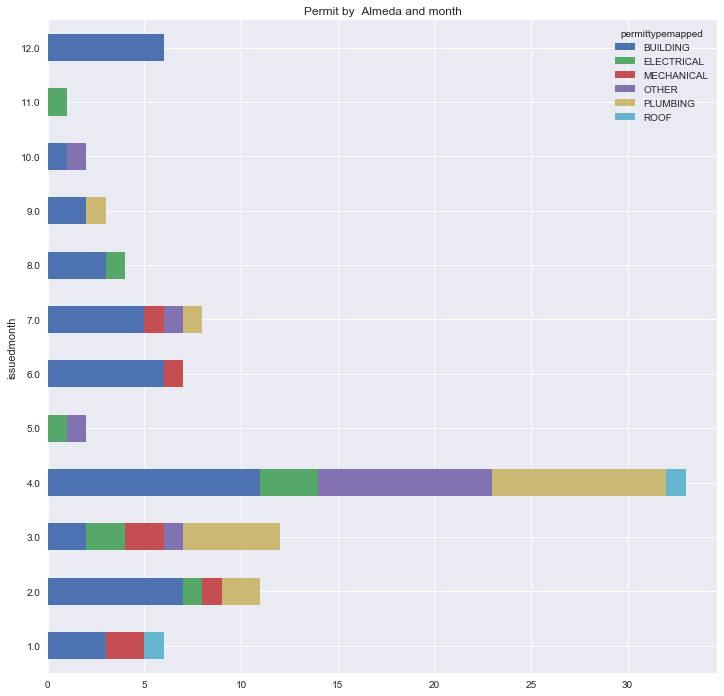

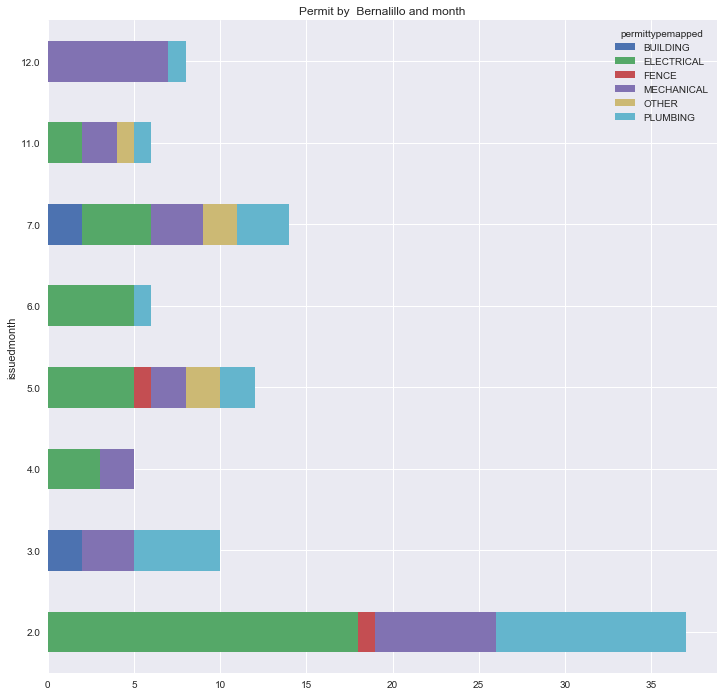

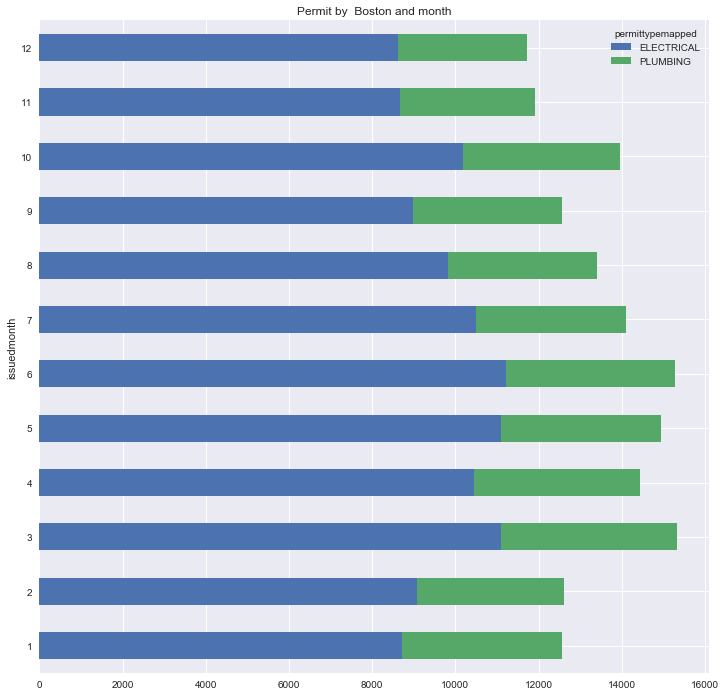

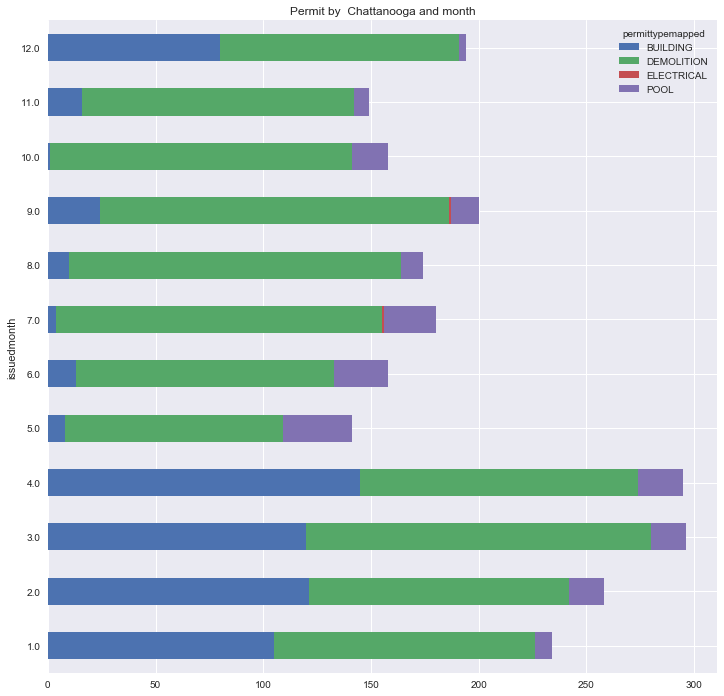

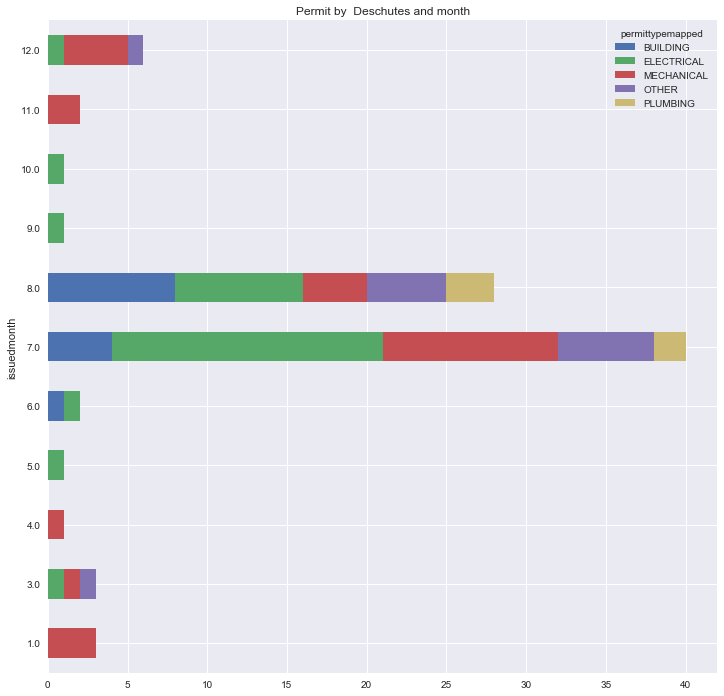

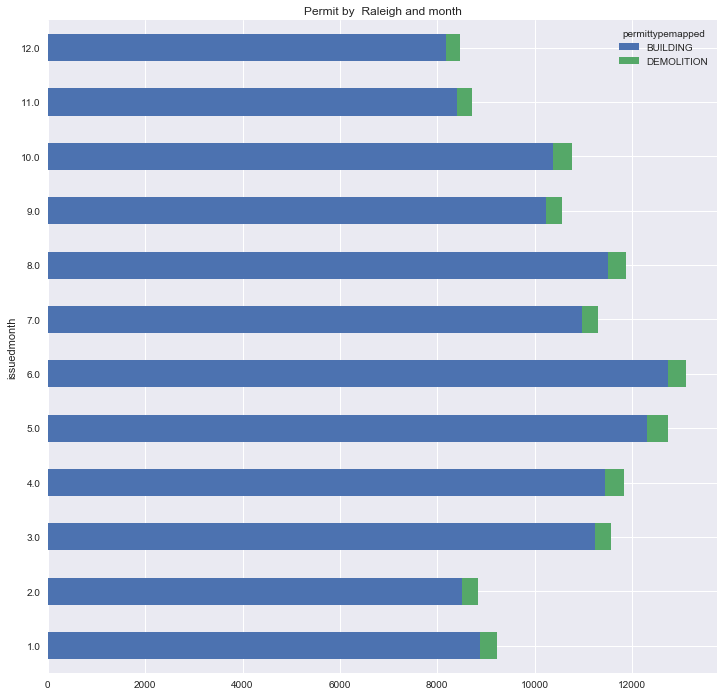

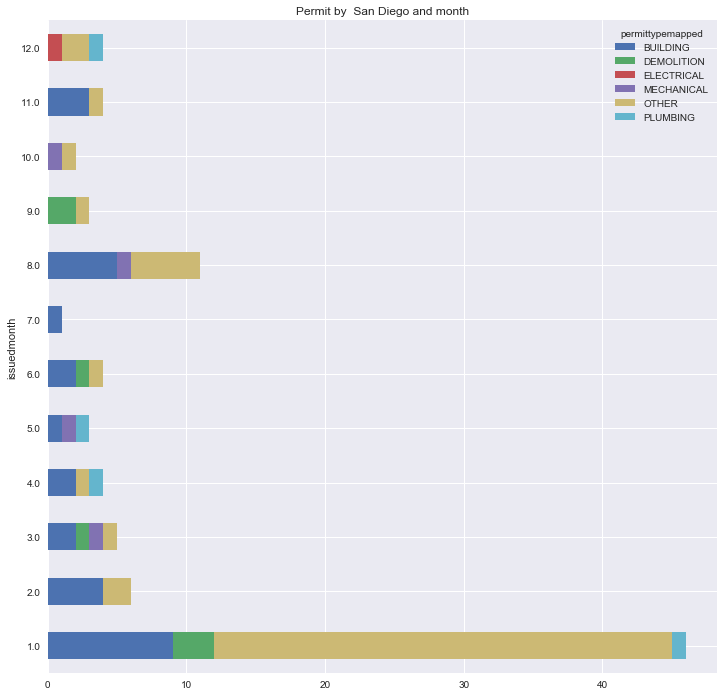

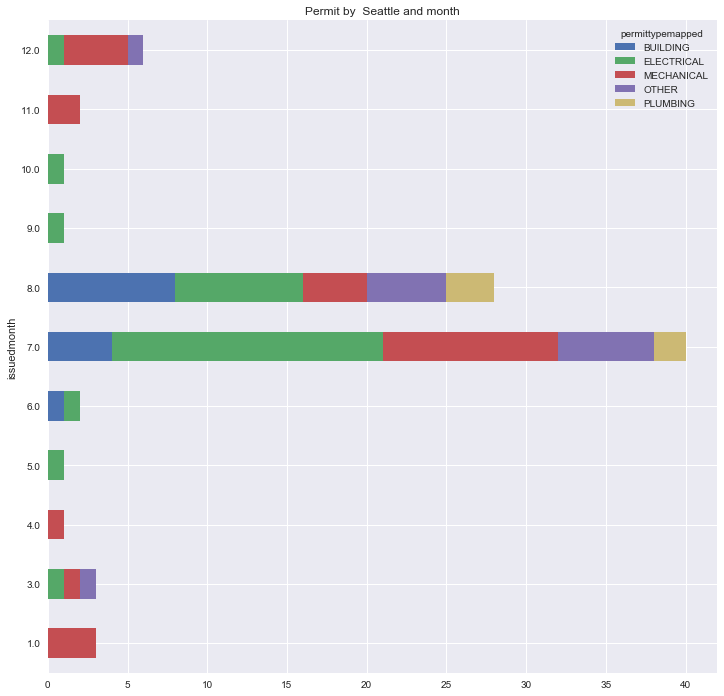

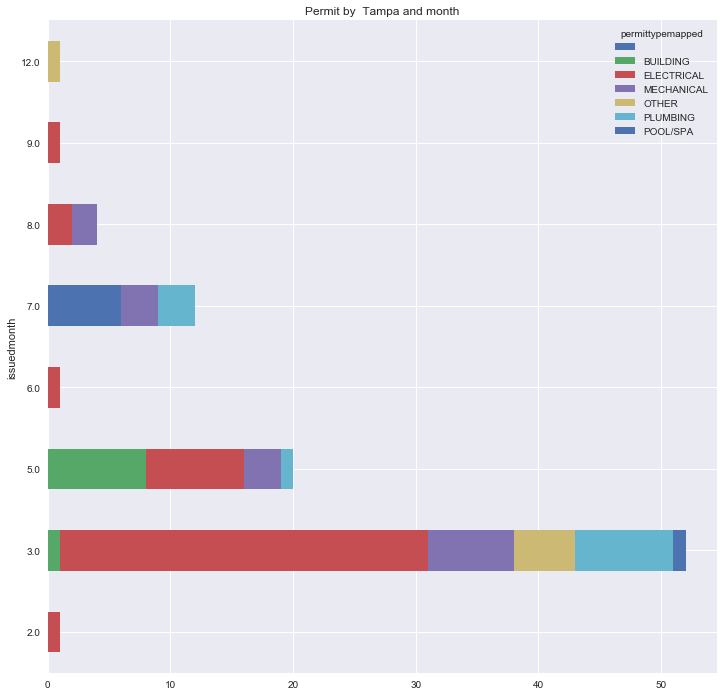

In [754]:
make_barh(permit_dfs, 'issuedmonth', 'permittypemapped', 'Permit by ')

In [3]:
agg_df_2010 = pd.read_csv('../_data/blds_csvs/standardized_blds.csv')

In [4]:
mean_fees_by_city = agg_df_2010[['city','permittypemapped','fee']].groupby(['city','permittypemapped']).mean()

In [13]:
top_100_mean_fees_by_city = mean_fees_by_city.reset_index().sort_values(['fee'], ascending=[False])[:100]

In [19]:
permit_type = []
avg_fee = []
for index, i in enumerate(top_100_mean_fees_by_city.iterrows()):#.available.count().to_frame():#.plot(kind='scatter')
    permit_type.extend([' '.join([i[1][0],i[1][1]])])
    avg_fee.append(i[1][2])

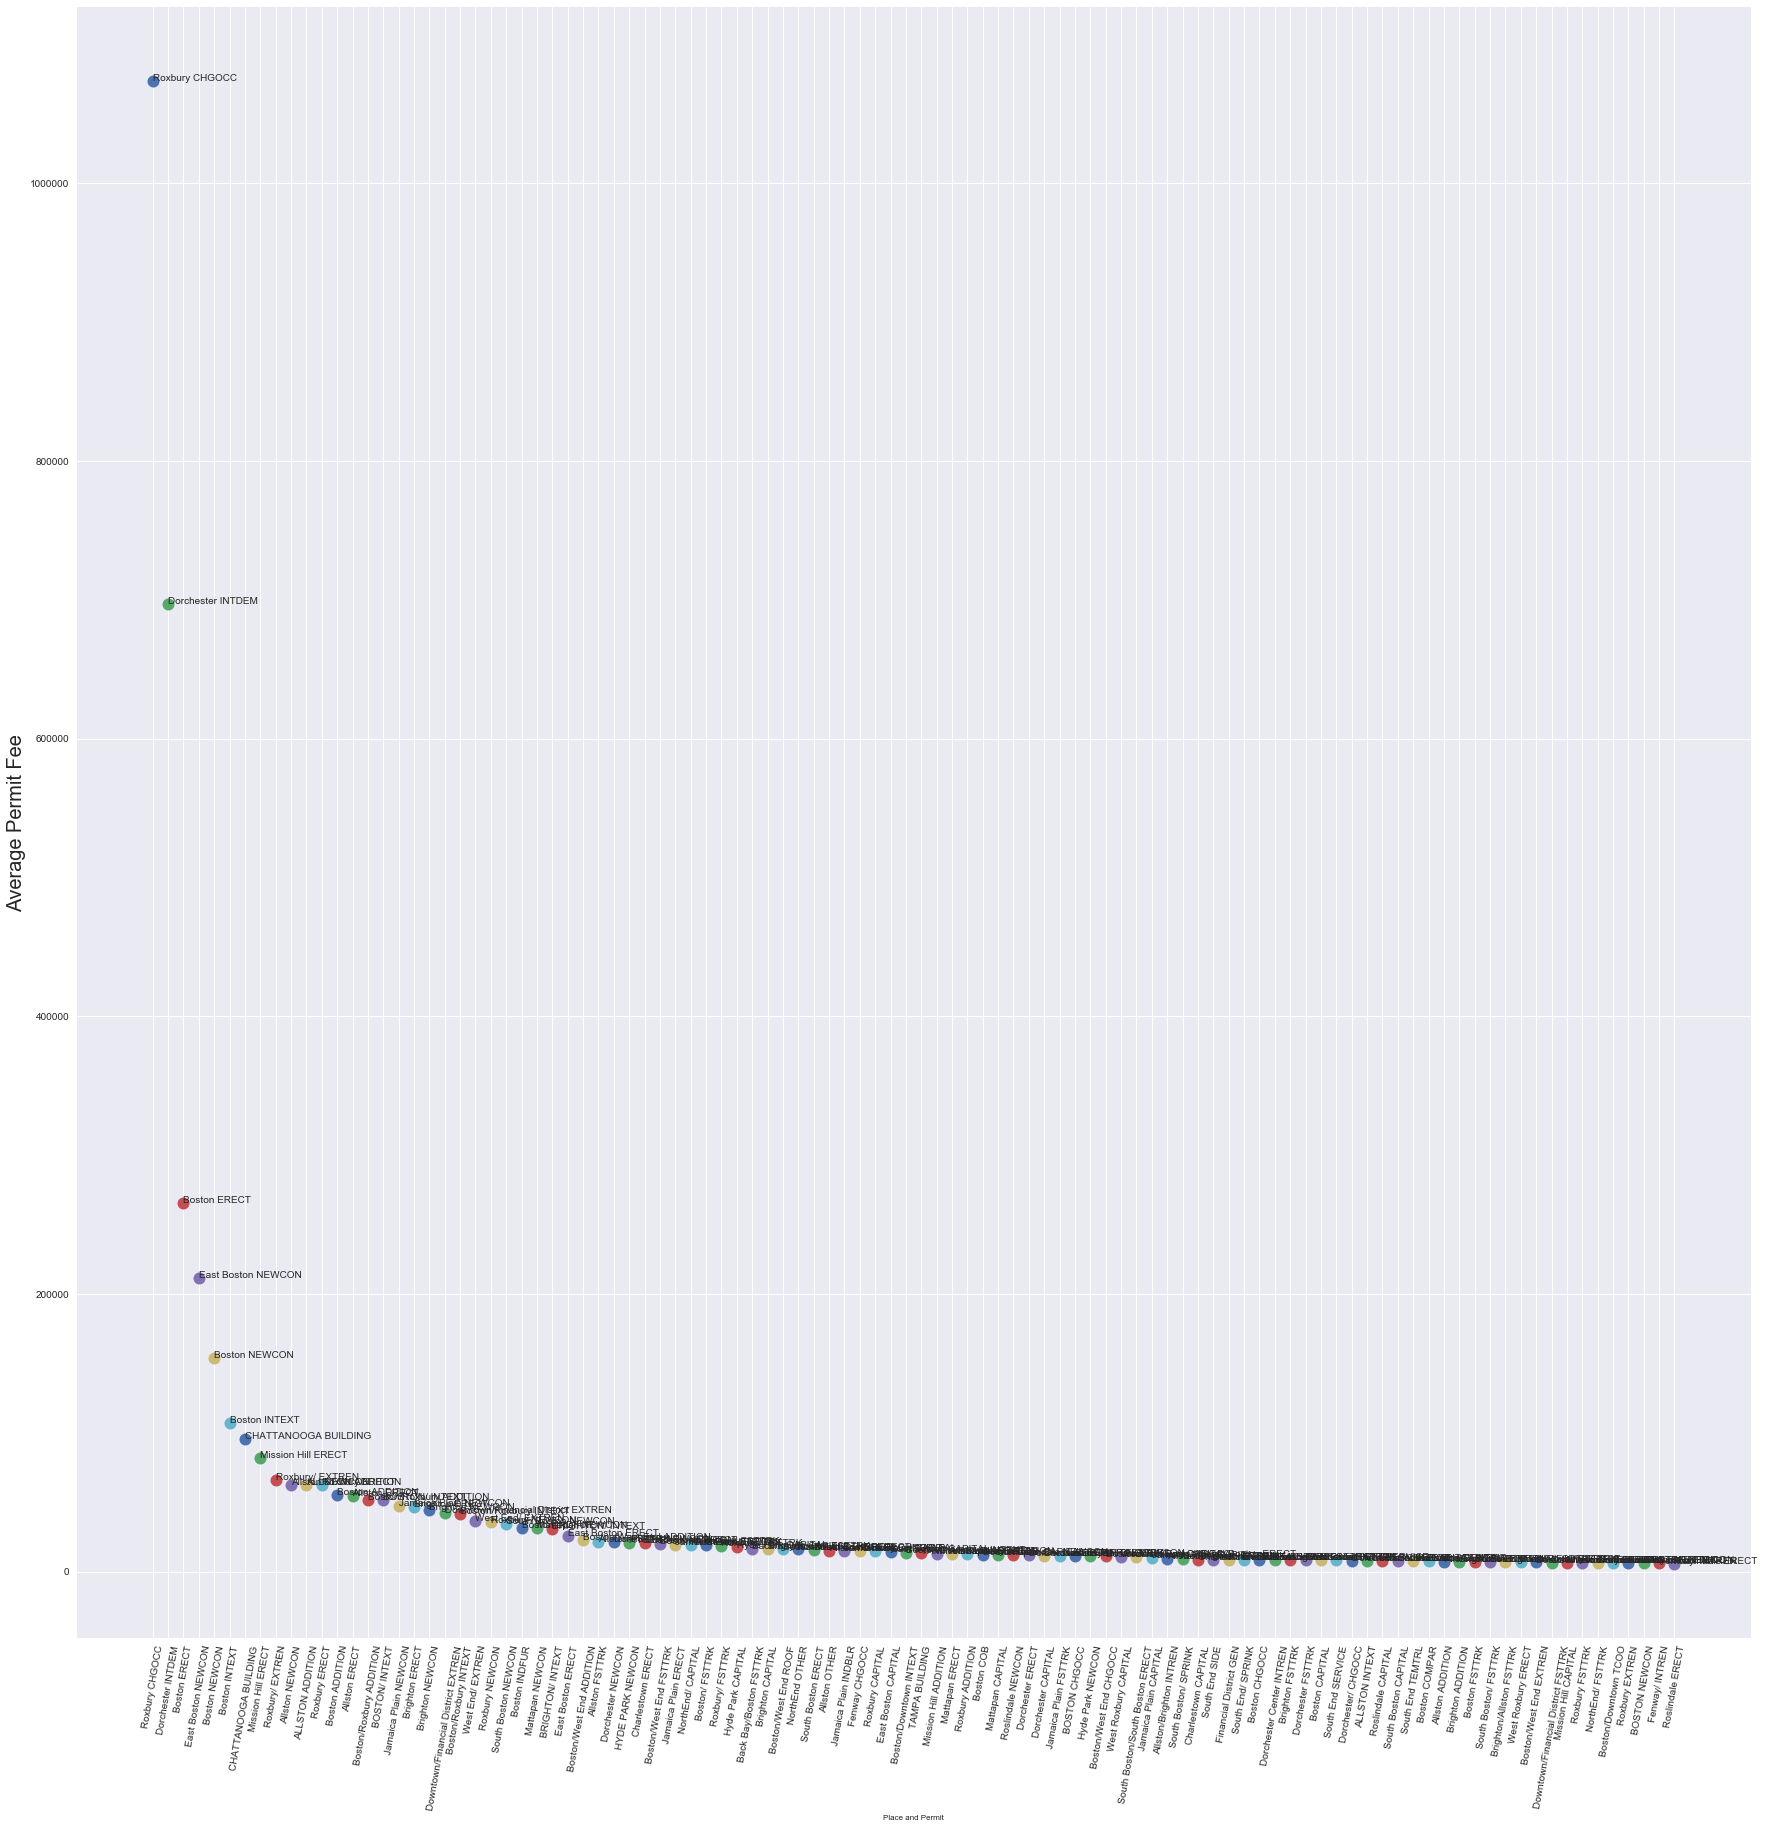

In [22]:
fig = plt.figure(figsize=(30,30))
plt.xticks(pd.Series(permit_type).index, permit_type, rotation=80)
ax = fig.add_subplot(1,1,1)
#ax.xticks(listing,None,rotation='vertical')
ax.set_ylabel('Average Permit Fee', fontsize=20)
ax.set_xlabel('Place and Permit', fontsize=8)
for index, i in enumerate(top_50_mean_fees_by_city.iterrows()):
    
    ax.plot(index, i[1][2], marker='o', linestyle='', ms=12)
    ax.text(index, i[1][2], ' '.join([i[1][0],i[1][1]]),horizontalalignment='left')